In [ ]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from cv2 import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
! pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download 'kritikseth/fruit-and-vegetable-image-recognition' --unzip

100% 1.98G/1.98G [00:20<00:00, 126MB/s]
100% 1.98G/1.98G [00:20<00:00, 102MB/s]


In [ ]:
val_path="validation"
train_path="train"

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_path,
                                                               seed=2509,
                                                               image_size=(224, 224),
                                                              batch_size=32)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_path,
                                                              seed=2509,
                                                              image_size=(224, 224),
                                                              shuffle=False,
                                                              batch_size=32)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [ ]:
class_names = train_dataset.class_names
print(len(class_names))

36


In [ ]:
class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
model = Sequential()
model.add(keras.layers.Rescaling(input_shape=(224,224,3)))
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(class_names),activation='softmax'))

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.001),
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 111, 111, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit(x=train_dataset,
                    epochs= 50,
                    validation_data=val_dataset)

Epoch 1/50
98/98 [==============================] - 101s 812ms/step - loss: 3.0385 - accuracy: 0.1737 - val_loss: 2.9801 - val_accuracy: 0.2080
Epoch 2/50
98/98 [==============================] - 71s 679ms/step - loss: 2.2080 - accuracy: 0.3557 - val_loss: 1.7647 - val_accuracy: 0.4758
Epoch 3/50
98/98 [==============================] - 70s 670ms/step - loss: 1.8971 - accuracy: 0.4343 - val_loss: 1.6121 - val_accuracy: 0.5014
Epoch 4/50
98/98 [==============================] - 70s 671ms/step - loss: 1.6433 - accuracy: 0.4966 - val_loss: 1.3191 - val_accuracy: 0.5670
Epoch 5/50
98/98 [==============================] - 70s 668ms/step - loss: 1.4103 - accuracy: 0.5724 - val_loss: 1.5790 - val_accuracy: 0.5442
Epoch 6/50
98/98 [==============================] - 70s 671ms/step - loss: 1.2249 - accuracy: 0.6135 - val_loss: 1.0335 - val_accuracy: 0.6952
Epoch 7/50
98/98 [==============================] - 69s 663ms/step - loss: 1.0502 - accuracy: 0.6838 - val_loss: 0.7027 - val_accuracy: 0.797

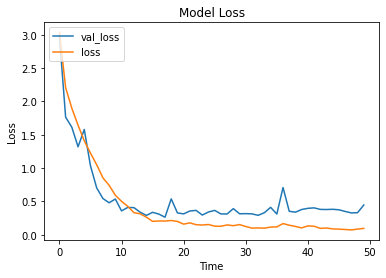

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Time')
plt.legend(['val_loss', 'loss'], loc='upper left')
plt.show()

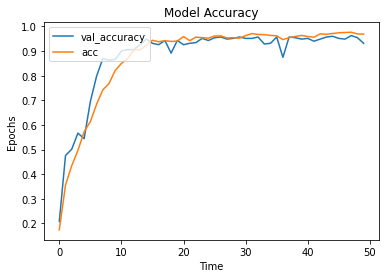

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Epochs")
plt.xlabel('Time')
plt.legend(['val_accuracy', 'acc'], loc='upper left')
plt.show()

In [ ]:
!pip install beautifulsoup4

In [ ]:
import requests
from bs4 import BeautifulSoup

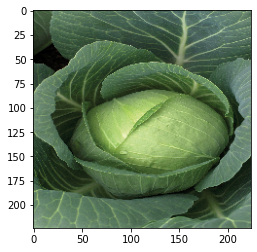

Actual: cabbage
Predicted: cabbage


In [ ]:
from keras_preprocessing import image
def show_model(image_path):
  img = image.load_img(image_path, target_size=(224,224,3))
  plt.imshow(img)
  plt.show()
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  pred = model.predict(images, batch_size=32)
  label = np.argmax(pred)
  print("Actual: "+image_path.split("/")[-2])
  print("Predicted: "+class_names[label])


show_model("test/cabbage/Image_7.jpg")

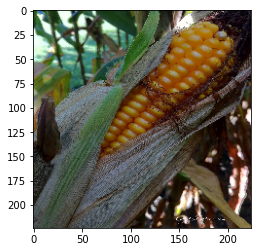

Actual: corn
Predicted: corn


In [ ]:
show_model("test/corn/Image_10.jpg")

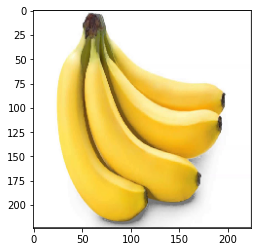

Actual: banana
Predicted: banana
the calories in bananais(105 calories)


In [ ]:
show_model("test/banana/Image_5.jpg")
food_name='banana'
html=requests.get('https://www.fatsecret.com/calories-nutrition/usda/'+food_name+'s')
soup = BeautifulSoup(html.content,"html.parser")
h=soup.find_all("td")[16].text.strip().split('\n')[1]
print("the calories in "+food_name+'is'+h)

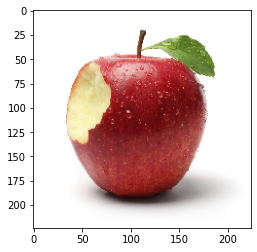

Actual: apple
Predicted: apple
the calories in appleis(72 calories)


In [ ]:
show_model("test/apple/Image_1.jpg")
food_name='apple'
html=requests.get('https://www.fatsecret.com/calories-nutrition/usda/'+food_name+'s')
soup = BeautifulSoup(html.content,"html.parser")
h=soup.find_all("td")[16].text.strip().split('\n')[1]
print("the calories in "+food_name+'is'+h)

In [ ]:
model.save("model.h5")

In [ ]:
model= tf.keras.models.load_model(os.path.join('drive','MyDrive','model.h5'))

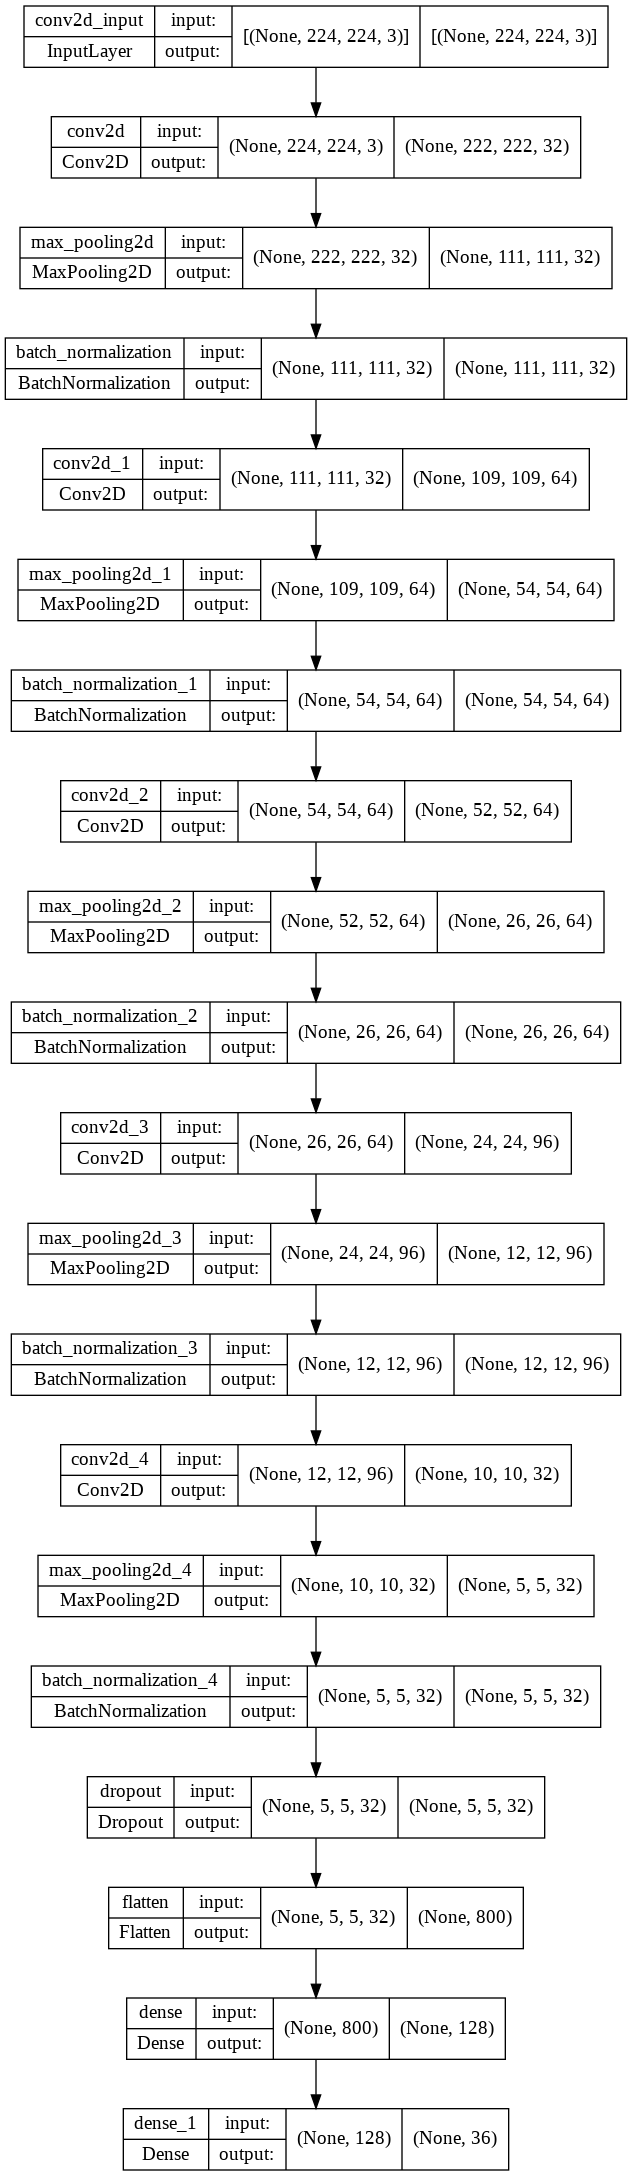

In [ ]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)